In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
from urllib.request import urlopen

from bs4 import BeautifulSoup



## one page scrape

In [5]:

start = time.time() #

i=2400;
#url = "https://sfbay.craigslist.org/search/apa?availabilityMode=0&sale_date=all+dates"
url = "https://sfbay.craigslist.org/search/apa?availabilityMode=0&s="+str(i)

#url = "https://www.united.com/ual/en/us/fly/travel/animals/in-cabin.html"

# headers = ({'User-Agent':
#             'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})



from requests import get
response = get(url)
#response = get(url,headers=headers)



soup = BeautifulSoup(response.text,'html')






resultrows = soup.find_all(class_="result-row");



hood=[];
for row in resultrows:

        resulthood = row.find(class_="result-hood")
        if resulthood is not None:
            if re.compile('[a-zA-Z/\s]+').search(resulthood.text.strip()) is not None:
                hood.append(re.compile('[A-Za-z\d/\s]+').search(resulthood.text.strip()).group().lower().strip())
            else:
                hood.append(np.NaN)
        else:
            hood.append(np.NaN)



link=[];
for a in soup.find_all('a',attrs={'class':'result-title hdrlnk'},href=True):
    link.append(a['href'])

description = [resultrow.find(class_="result-title").text for resultrow in resultrows]

### ADD A THING THAT ALSO LOOKS FOR NUMBER OF BEDROOMS IN THE DESCRIPTION

prices=[];
for row in resultrows:
    whereprice=re.compile('\d+').search(row.find(class_="result-price").text);
    if whereprice is not None:
        prices.append(float(whereprice.group()))
    else:
        prices.append(np.NaN)

#prices=[ float(re.compile('\d+').search(i.find(class_="result-price").text).group())   for i in resultrows]

#classhousing=[i.find(class_="housing") for i in resultrows]

br=[];
sqfeet = [];
for row in resultrows:
    classhousing = row.find(class_="housing");
    if classhousing is not None:
#for i in classhousing:
#    if i is not None:
        containsbr = re.compile('\d+br').search(classhousing.text);
        if containsbr is not None:
            br.append(int( re.compile('\d+').search(containsbr.group()).group()))
        else:
            try:
                descr=row.find(class_="result-title").text.lower();
                br.append(int(re.compile('\d+').search(re.compile('(\d+br|\d+bdr|\d+-br|\d+-bdr)').search(descr).group()).group()))
            except:
                br.append(np.NaN)
        containssqfeet = re.compile('\d+ft2').search(classhousing.text);
        if containssqfeet is not None:
            sqfeet.append(float( re.compile('\d+').search(containssqfeet.group()).group() ))
        else:
            sqfeet.append(np.NaN)
    else:
        br.append(np.NaN)
        sqfeet.append(np.NaN)


#brsqfeet=[i.find(class_="housing").text for i in resultrows]
#br = [int(re.compile('\d+').search(re.compile('\d+br').search(i).group()).group()) for i in brsqfeet]


#time.sleep(3)

end = time.time()


In [14]:
## compare to using urlopen(url)
# response2 = urlopen(url)
# soup2 = BeautifulSoup(response2)

In [15]:
# resultrows2=soup2.find_all(class_="result-row")
# resultrows = soup.find_all(class_="result-row")

In [6]:
st = time.time()

hood=[];
link=[];
prices=[];
br=[];
sqfeet = [];
description=[];


i=0


url = "https://sfbay.craigslist.org/search/apa?availabilityMode=0&s="+str(i)


#response = get(url,headers=headers)
response = get(url)


soup = BeautifulSoup(response.text,'html')
resultrows = soup.find_all(class_="result-row");

descr = [resultrow.find(class_="result-title").text for resultrow in resultrows]
description.append(descr)


for a in soup.find_all('a',attrs={'class':'result-title hdrlnk'},href=True):
    link.append(a['href'])

for i in resultrows:

    resulthood = i.find(class_="result-hood")
    if resulthood is not None:
        if re.compile('[a-zA-Z/\s]+').search(resulthood.text.strip()) is not None:
            neighborhood =  re.sub('[\(\)]','', resulthood.text.strip().lower() )  
            hood.append(neighborhood)
        else:
            hood.append(np.NaN)
    else:
        hood.append(np.NaN)


    resultprice=i.find(class_="result-price")
    if resultprice is not None:
        whereprice = re.compile('\d+').search(resultprice.text)
        if whereprice is not None:
            prices.append(float(whereprice.group()))
        else:
            prices.append(np.NaN)
    else:
        prices.append(np.NaN)


for i in resultrows:
    classhousing = i.find(class_="housing");
    if classhousing is not None:
        containsbr = re.compile('\d+br').search(classhousing.text);
        if containsbr is not None:
            br.append(int( re.compile('\d+').search(containsbr.group()).group()))
        else:
            try:
                descr=i.find(class_="result-title").text.lower();
                br.append(int(re.compile('\d+').search(re.compile('(\d+br|\d+bdr|\d+-br|\d+-bdr)').search(descr).group()).group()))
            except:
                br.append(np.NaN)
        containssqfeet = re.compile('\d+ft2').search(classhousing.text);
        if containssqfeet is not None:
            sqfeet.append(float( re.compile('\d+').search(containssqfeet.group()).group() ))
        else:
            sqfeet.append(np.NaN)
    else:
        br.append(np.NaN)
        sqfeet.append(np.NaN)



#time.sleep(3)

    
#descriptionflat = [x for y in description for x in y] #flatten description list

ee = time.time()

print(f"Time to open url, make a soup, pull 'resultrows' out of the soup, and for each element of resultrows build list of neighborhoods, links, descriptions, prices, number of bedrooms, and square footage: {ee-st}s.")



Time to open url, make a soup, pull 'resultrows' out of the soup, and for each element of resultrows build list of neighborhoods, links, descriptions, prices, number of bedrooms, and square footage: 2.038501024246216s.


In [7]:
resultrows[89].find(class_="result-hood")

<span class="result-hood"> (san jose downtown)</span>

In [35]:
hoodx=[];
resulthood = resultrows[0].find(class_="result-hood")
if resulthood is not None:
    if re.compile('[a-zA-Z/\s]+').search(resulthood.text.strip()) is not None:
        neighborhood = re.compile('[a-zA-Z/\s]+').search(resulthood.text.strip()).group()
        #neighborhood =  re.sub('[\(\)]','', resulthood.text.strip().lower() )  #remove parentheses from neighborhood name
        hoodx.append(neighborhood)
    else:
        hoodx.append(np.NaN)
else:
    hoodx.append(np.NaN)

In [29]:
neighborhood[0]+', '+neighborhood[1]

'marina, cow hollow'

In [32]:
#make list of neighborhoods
hood=[]
for i in resultrows:
        
        resulthood = i.find(class_="result-hood")
        if resulthood is not None:
            containsnh = re.compile('[a-zA-Z/\s]+').search(resulthood.text.strip())
            if containsnh is not None:
                neighborhood =  containsnh.group().strip().lower()
                if neighborhood == '':
                    neighborhood = np.NaN #this is just a patch to get turn '' into np.NaN.
                hood.append(neighborhood)
            else:
                hood.append(np.NaN)
        else:
            hood.append(np.NaN)

In [33]:
hood

['albany / el cerrito',
 'sunset / parkside',
 'berkeley',
 'richmond / seacliff',
 'mission district',
 'napa county',
 'palo alto',
 'san jose downtown',
 'palo alto',
 'berkeley',
 'san jose west',
 'berkeley',
 'palo alto',
 'berkeley',
 'downtown oakland',
 'milpitas',
 'berkeley',
 'berkeley',
 'richmond / point / annex',
 'redwood city',
 'la terrace cir',
 'berkeley',
 'petaluma',
 'gilroy',
 'san jose south',
 'oakland rockridge / claremont',
 'west oakland',
 'north oakland',
 'mountain view',
 'downtown oakland',
 'downtown oakland',
 'san jose south',
 'petaluma',
 'berkeley',
 'mill valley',
 'menlo park',
 nan,
 'west oakland',
 'emeryville',
 'west oakland',
 'downtown oakland',
 'berkeley',
 'san jose downtown',
 'concord / pleasant hill / martinez',
 'redwood shores',
 'san jose downtown',
 'walnut creek',
 'mountain view',
 'cupertino',
 'berkeley north / hills',
 'oakland lake merritt / grand',
 'berkeley',
 'berkeley',
 'sunnyvale',
 'downtown oakland',
 'san franci

In [39]:
resulthood=resultrows[50].find(class_="result-hood")
resulthood=resulthood.text.strip()
re.compile('[A-Za-z\d/\s]+').search(resulthood)

<re.Match object; span=(1, 33), match='West San Jose / Willow Glen Area'>

In [ ]:
cdata = {'description':description,
         'link':link,
         'bedrooms':br,
         'sq. feet':sqfeet,'price':prices}
df = pd.DataFrame(cdata)

## scrape all pages

In [77]:
from urllib.request import urlopen

In [78]:
url = "https://sfbay.craigslist.org/search/apa?availabilityMode=0"

html = urlopen(url)
soup = BeautifulSoup(html,'html')

In [79]:
rangefrom=int(soup.find(class_="rangeFrom").text)
rangeto=int(soup.find(class_="rangeTo").text)
perpage = rangeto-rangefrom+1
print(f"{perpage} listings per page")

totalcount = int(soup.find(class_="totalcount").text)
print(f"There are a total of {totalcount} listings.")

print(f"That's {int(totalcount/perpage)} pages.")

120 listings per page
There are a total of 3000 listings.
That's 25 pages.


In [146]:
from requests import get

#headers = ({'UseIIr-Agent':
#            'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36'})
##use header in case website is blocking scrape; to appear more human
##apparently not necessary for craigslist


start = time.time()#time before initializing lists

#initialize lists to contain data on each listing
hood=[];
link=[];
prices=[];
br=[];
sqfeet = [];
description=[];

for i in range(0,totalcount,perpage):
    url = "https://sfbay.craigslist.org/search/apa?availabilityMode=0&s="+str(i)
    
    #response = get(url,headers=headers)
    response = get(url)
    
    soup = BeautifulSoup(response.text,'html')
    resultrows = soup.find_all(class_="result-row"); #each listing has a "result-row"

    #description
    descr = [resultrow.find(class_="result-title").text for resultrow in resultrows]
    description.append(descr)
    
    #link
    for a in soup.find_all('a',attrs={'class':'result-title hdrlnk'},href=True):
        link.append(a['href'])

    for i in resultrows:
        
        resulthood = i.find(class_="result-hood")
        if resulthood is not None:
            containsnh = re.compile('[a-zA-Z/\s-]+').search(resulthood.text.strip()) #this way, neighborhoods containing digits don't get pulled.
            #not sure this is what i want. consider pulling everything but the parnetheses.
            if containsnh is not None:
                neighborhood =  containsnh.group().strip().lower()
                if neighborhood == '':
                    neighborhood = np.NaN #this is just a patch to turn '' into np.NaN.
                hood.append(neighborhood)
            else:
                hood.append(np.NaN)
        else:
            hood.append(np.NaN)
        
        
        resultprice=i.find(class_="result-price")
        if resultprice is not None:
            whereprice = re.compile('\d+').search(resultprice.text)
            if whereprice is not None:
                prices.append(float(whereprice.group()))
            else:
                prices.append(np.NaN)
        else:
            prices.append(np.NaN)

            
    for i in resultrows:
        classhousing = i.find(class_="housing");
        if classhousing is not None:
            containsbr = re.compile('\d+br').search(classhousing.text);
            if containsbr is not None:
                br.append(int( re.compile('\d+').search(containsbr.group()).group()))
            else:
                try:
                    descr=i.find(class_="result-title").text.lower();
                    br.append(int(re.compile('\d+').search(re.compile('(\d+br|\d+bdr|\d+-br|\d+-bdr)').search(descr).group()).group()))
                except:
                    br.append(np.NaN)
            containssqfeet = re.compile('\d+ft2').search(classhousing.text);
            if containssqfeet is not None:
                sqfeet.append(float( re.compile('\d+').search(containssqfeet.group()).group() ))
            else:
                sqfeet.append(np.NaN)
        else:
            br.append(np.NaN)
            sqfeet.append(np.NaN)
        
    
    
    time.sleep(3)

    
descriptionflat = [x for y in description for x in y] #flatten description list

end=time.time()#time after lists are built from all craigslist pages
print(f"Time to scrap all pages and build lists: {end-start}s.")

Time to scrap all pages and build lists: 130.52773809432983s.


In [147]:
#make a data frame (and save to csv)
cdata = {'description':descriptionflat,
         'link':link,
         'bedrooms':br,
         'sq. feet':sqfeet,
         'neighborhood':hood,
         'price':prices}
df = pd.DataFrame(cdata)



df.to_csv('craigslist_bay_area_rentals.csv')
#df = pd.read_csv('craigslist_bay_area_rentals.csv',index_col=0)

In [148]:
# for nh in hoods:
#     if type(nh)!=float:
#         containsca1=re.compile(', ca').search(nh)
#         containsca2=re.compile(',ca').search(nh)#remove ', ca$' and ',ca$' from neighborhoods.
#         if containsca2 is not None:
#             print(containsca2)
#         if containsca1 is not None:
#             print(containsca1)

In [149]:
## to read in data instead of re-scraping it:
# df = pd.read_csv('craigslist_bay_area_rentals.csv',index_col=0)
# hood = df['neighborhood'].values
# descriptionflat = df['description'].values

In [150]:
#put the neighborhoods into an "or" set to compile and search for in descriptions
#NOTE:  "hood" is the list of neighborhoods, ordered by listing.
#  "hoods" is the list of unique neighborhoods appearing in "hood".

hoods = list(set(hood));
hoods = [nh for nh in hoods if str(nh)!='nan'];
         #list(set(hood))[1:] #(get rid of nan)
    
hoods = [nh for nh in hoods if re.compile('\d').search(nh) is None ]
#banish hoods containing digits



#divide hoods containing slashes
hoodssep=hoods[:]
for nh in hoods:
    slashed = re.compile('[\S\s]*/[\S\s]*').search(nh);
    if slashed is not None:
        slashed = slashed.group()
        separated = re.compile('[^/]+').findall(slashed)
        separated = [s.strip().lower() for s in separated] #strip spaces from beginning and end
        #hoodssep = hoodssep.remove(nh)
        hoodssep = hoodssep + separated
        hoodssep.remove(nh)
    #done this way, "downtown" winds up in neighborhood list. can just remove it, but what other problems like this exist?
hoodssep.remove('downtown')

orhoods='('+str(hoodssep[0]);
for nh in hoodssep[1:]:
    orhoods = orhoods + '|' + str(nh)
orhoods = orhoods + ')'

#re.compile(orhoods).search(desc).group()

#patch in neighborhoods if mentioned in description

hood2=hood[:]
for i,h in enumerate(hood):
    if type(h)==float:
        desc = descriptionflat[i].lower()
        deschood=re.compile(orhoods).search(desc)
        if deschood is not None:
            hood2[i] = deschood.group()
            print(f"Fixed listing {i}: hood was {h} and is now {hood2[i]}.")  
        #
   
    elif re.compile('[\d]+').search(h) is not None:
        digits = re.compile('[\d]+').search(h)
        hoodhood = re.compile(orhoods).search(h) #NOTE: orhoods now contains no neighborhoods with digits.
        if hoodhood is not None:
            hood2[i] = hoodhood.group()
            print(f"Fixed listing {i}: hood was {h} and is now {hood2[i]}.")
            

##this is problem: need to get "downtown" out of "hoodssep."


Fixed listing 49: hood was nan and is now petaluma.
Fixed listing 77: hood was nan and is now san francisco.
Fixed listing 122: hood was nan and is now mountain view.
Fixed listing 304: hood was nan and is now mountain view.
Fixed listing 722: hood was nan and is now san jose.
Fixed listing 2048: hood was nan and is now los gatos.
Fixed listing 2802: hood was nan and is now richmond.


In [151]:
hoods = list(set(hood2));
hoods = [nh for nh in hoods if str(nh)!='nan'];
         #list(set(hood))[1:] #(get rid of nan)
    
    


In [152]:
# for nh in hood:
#     if type(nh)!=float:
#         if re.compile('downtown').search(nh) is not None:
#             print(nh)

As pulled from Craigslist, "San Francisco" is broken down into many neighborhoods. I would like to lump these all into "san francisco", so I can have enough samples per neighborhood to do statistics. (Same for Oakland. Also San Jose, but those "neighborhoods" tend to contain the words "San Jose".)

I'll try scraping neighborhood names from Wikipedia:

In [153]:
urlsfnh="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco"

htmlsfnh=urlopen(urlsfnh)

soupsfnh = BeautifulSoup(htmlsfnh,'html')

allsections=soupsfnh.select('.toclevel-1')

sfhoods=[];
for sec in allsections:
    sfhoods.append(re.compile("[a-z\s/'-]+").search(sec.text.lower()).group().strip())
    
sfhoods = [nh for nh in sfhoods if nh.lower() not in ['see also','references', 'external links']]


sfhoods.append('san francisco') #go ahead and include "san francisco"

In [154]:
urloak="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Oakland,_California"

htmloak=urlopen(urloak)

soupoak = BeautifulSoup(htmloak,'html')

allsections=soupoak.select('.toclevel-1')

oakhoods=[];
for sec in allsections:
    oakhoods.append(re.compile("[a-z\s/'-]+").search(sec.text.lower()).group().strip())
    
oakhoods=[nh for nh in oakhoods if nh.lower() not in ['see also','references', 'external links']]

oakhoods.append('oakland')

In [155]:
# #THIS IS NOT GOOD. BECAUSE THINGS LIKE "CASTRO VALLEY" GET LABELED "SAN FRANCISCO", BECAUSE "CASTRO" IS AN SF NEIGHBORHOOD.
# #NEED A WAY TO MATCH NEIGHBORHOODS UP TO PUNCTUATION, RATHER THAN JUST PARTS.
# #BUT ALSO NEED TO ALLOW FOR SLASHES.

# st = time.time()

# hoodnew = hood2[:];

# imax = 200#len(hood2)#set to limit print-outs

# for i,nh in enumerate(hood2):
#     if str(nh)!='nan':
#             for sfhood in sfhoods:
#                 if re.compile(sfhood).search(nh) is not None: #but how to search less strictly, e.g. allow different punctuation
#                     if re.compile('south san francisco').search(nh) is None: #leave "south san francisco" as is.
#                         hoodnew[i] = 'san francisco'
#                         if i<50:
#                             print(f"changed '{nh}' to '{hoodnew[i]}'.")
#             for oakhood in oakhoods:
#                 if re.compile(oakhood).search(nh) is not None:
#                     hoodnew[i] = 'oakland'
#                     if i<imax:
#                         print(f"changed '{nh}' to '{hoodnew[i]}'.")
#             if re.compile('san jose').search(nh) is not None:
#                 hoodnew[i] = 'san jose'
#                 if i<imax:
#                     print(f"changed '{nh}' to '{hoodnew[i]}'.")
# #             elif re.compile('san francisco').search(nh) is not None:
# #                 if re.compile('south san francisco') is None:
# #                     hoodnew[i] = 'san francisco'
# #                     if i<imax:
# #                         print(f"changed '{nh}' to '{hoodnew[i]}'.")
                    
# end = time.time()

# end-st

In [156]:
st = time.time()


hood3=hood2[:];

imax = 200#len(hood2)#set to limit print-outs
for i,nh in enumerate(hood2):
    
    
    
    
    
    
    
    ######
    if nh in sfhoods: #or any part of nh? how can i implement this..? then i wouldn't need the next elif
        hood3[i] = 'san francisco' #if it's an sf neighborhood, change "hood" to just "san francisco"
        if i<imax:
            print(f"Changed '{nh}' to '{hood3[i]}'.")
    elif nh in oakhoods:
        hood3[i] = 'oakland' #change oakland neighborhoods to "oakland"
        if i<imax:
            print(f"Changed '{nh}' to '{hood3[i]}'.")
    elif str(nh)!='nan':
        if re.compile('san jose').search(nh) is not None:
            hood3[i] = 'san jose'  
            if i<imax:
                print(f"Changed '{nh}' to '{hood3[i]}'.")#change any neighborhood that contains "san jose" to "san jose"        if re.compile('san francisco').search(nh) is not None:
            if re.compile('south san francisco').search(nh) is None:#leave 'south san francisco'
                hood3[i] = 'san francisco'
                if i<imax:
                    print(f"Changed '{nh}' to '{hood3[i]}'.")#change any neighborhood containing "san francisco" to "san francisco".
#in hood3 neighborhoods of sf, oakland, san jose, have been changed to respective city.


end=time.time()


t1=end-st

Changed 'noe valley' to 'san francisco'.
Changed 'san jose south' to 'san jose'.
Changed 'san jose south' to 'san francisco'.
Changed 'russian hill' to 'san francisco'.
Changed 'russian hill' to 'san francisco'.
Changed 'russian hill' to 'san francisco'.
Changed 'russian hill' to 'san francisco'.
Changed 'san jose south' to 'san jose'.
Changed 'san jose south' to 'san francisco'.
Changed 'mission district' to 'san francisco'.
Changed 'mission district' to 'san francisco'.
Changed 'san jose downtown' to 'san jose'.
Changed 'san jose downtown' to 'san francisco'.
Changed 'lower haight' to 'san francisco'.
Changed 'lower haight' to 'san francisco'.
Changed 'tenderloin' to 'san francisco'.
Changed 'tenderloin' to 'san francisco'.
Changed 'pacific heights' to 'san francisco'.
Changed 'russian hill' to 'san francisco'.
Changed 'san jose west' to 'san jose'.
Changed 'san jose west' to 'san francisco'.
Changed 'san jose downtown' to 'san jose'.
Changed 'san jose downtown' to 'san francisco'.
C

In [157]:
#re-define hoods so it no longer includes neighborhoods of sf, oakland, san jose
hoods = list(set(hood3)) 
hoods = [nh for nh in hoods if str(nh)!='nan'] #remove nan

In [158]:
start = time.time()


#and again divide hoods containing slashes
hoodssep=hoods[:]
for nh in hoods:
    slashed = re.compile('[\S\s]*/[\S\s]*').search(nh);
    if slashed is not None:
        slashed = slashed.group()
        separated = re.compile('[^/]+').findall(slashed)
        separated = [s.strip().lower() for s in separated] #strip spaces from beginning and end
        #hoodssep = hoodssep.remove(nh)
        hoodssep = hoodssep + separated
        hoodssep.remove(nh)
# if 'downtown' in hoodssep:
#     print('downtown is in there again')
    #bug here: "downtown" winds up in neighborhood list. can just remove it, but what other problems like this exist?
hoodssep.remove('downtown')


end = time.time()


t2 = end-start

In [159]:
hood3

['sunnyvale',
 'san francisco',
 'oakland downtown',
 'san francisco',
 'downtown / civic / van ness',
 'downtown / civic / van ness',
 'soma / south beach',
 'cole valley / ashbury hts',
 'soma / south beach',
 'san francisco',
 'san francisco',
 'san francisco',
 'san francisco',
 'downtown / civic / van ness',
 'downtown / civic / van ness',
 'san francisco',
 'lafayette / orinda / moraga',
 'san francisco',
 'san francisco',
 'downtown / civic / van ness',
 'san francisco',
 'san francisco',
 'hayward / castro valley',
 'san francisco',
 'san mateo',
 'san francisco',
 'san francisco',
 'laurel hts / presidio',
 'northside',
 'cupertino',
 'pittsburg / antioch',
 'oakland rockridge / claremont',
 nan,
 'santa clara',
 'marina / cow hollow',
 'richmond / seacliff',
 'san francisco',
 'san francisco',
 'soma / south beach',
 'mountain view',
 'cole valley / ashbury hts',
 'berkeley',
 'walnut creek',
 'danville / san ramon',
 'berkeley',
 'san francisco',
 'san francisco',
 'san fran

In [160]:
#there are still some "neighborhoods" that are addresses.
#some do not contain neighborhood info.
#some do, but the neighborhood wasn't in the "hoods" list,
#     so the program doesn't recognize it as a neighborhood.
#this is just happening with fremont, right now.
for nh in hood3:
    x=re.compile('[\d]+').findall(str(nh))
    if x!=[]:
        print(nh)

In [161]:
start = time.time()


#still need take care of things like, e.g., "alamo square / nopa", both sf neighborhoods.
#(is this redundant now? check)

combohoods=[];

slashes = re.compile('/')

hood4=hood3[:];
for i,nh in enumerate(hood3):
    if str(nh)!='nan':
        combohood = slashes.search(nh)
        if combohood is not None:
            #print(nh)
            pieces= (re.compile("[a-z\s'-]+").findall(nh))
            for pc in pieces:
                if pc in sfhoods:
                    hood4[i] = 'san francisco'
                    print(f"changed {nh} to {hood4[i]}.")
                #else if pc in oakhoods:
                #    hood4[i] = 'oakland'
end  = time.time()

t3 = end-start

changed mount davidson/monterey hts/westwood park to san francisco.
changed mount davidson/monterey hts/westwood park to san francisco.


In [162]:
#would likely be more efficient to already, above, check whether each 'hood' /contains/ an sf (or oakland)
# neighborhood, rather than being equal to in full. 

In [163]:
#replace with updated hoods
df['neighborhood']=hood4;

In [164]:
#still lots of missing neighborhoods:
print(f"There are still {  len(df[df['neighborhood'].isna()])  } listings with missing neighborhood information.")
      
      

There are still 48 listings with missing neighborhood information.


Drop duplicate postings, remove rows with missing data (and sometimes rescale so all features have similar range).

In [165]:

df_no_duplicates=df.drop_duplicates(subset=['description','price'])


dfclean=df_no_duplicates.dropna()[:] #remove rows with missing data

#not using area as a feature now
#dfclean['1000sqfeet']=dfclean['sq. feet']/1000  #normalize so all features are order 1 (no area is in 1000s of square feet)
#no need to rescale price when only using one feature per neighborhood
#dfclean['pricek']=dfclean['price']/1000 #normalize so all features are order 1 (price is in thousands of dollars)

#discard listings with truly enormous rent (probably actually for sale)
dfclean=dfclean.loc[dfclean['price']<1e4]


In [166]:
#narrow down neighborhoods considered. there are too many, with not enough samples for most.
byhood=dfclean.groupby(by='neighborhood').count()['description'].sort_values(ascending=False)
maxhoods=list(byhood[byhood>50].index) #pick off only neighborhoods with >50 listings

In [167]:
#not using these now
# #neighborhood dummy variables

# for nh in maxhoods:
#     if type(nh) is not float:
#         dfclean[nh]=np.zeros(len(dfclean))
#         dfclean.loc[dfclean['neighborhood']==nh,nh]=1

In [168]:
maxhoods

['san francisco',
 'sunnyvale',
 'santa clara',
 'dublin / pleasanton / livermore',
 'fremont / union city / newark',
 'soma / south beach',
 'mountain view',
 'campbell',
 'berkeley']

In [170]:
### why is soma / south beach not getting changed to "san francico" ?

## build a data frame with only the neighborhoods from maxhoods

In [171]:
#let's just consider neighborhood and price per room as features.

#make a new dataframe with only listings in these neighborhoods
listofframes=[];
for i,nh in enumerate(maxhoods):
    dfnh=dfclean.loc[dfclean['neighborhood']==nh]
    listofframes.append(dfnh)

dflim=pd.concat(listofframes)

#add a feature: rent per room
dflim['rent per room'] = dflim['price']/dflim['bedrooms'];

## visualize

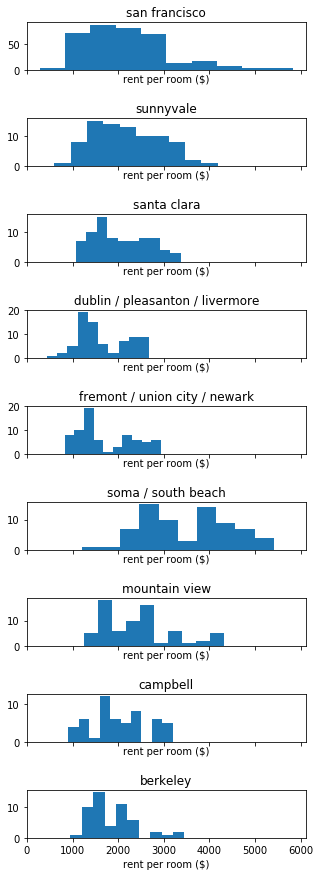

In [172]:
#plot price distributions for each neighborhood
fig,ax = plt.subplots(len(maxhoods),figsize=(5,15),sharex=True)
plt.subplots_adjust(hspace=1)
for i,nh in enumerate(maxhoods):
    ax[i].hist(dflim.loc[dflim['neighborhood']==nh]['rent per room'],bins=10)
    ax[i].set_title(nh)
    ax[i].set_xlabel('rent per room ($)')

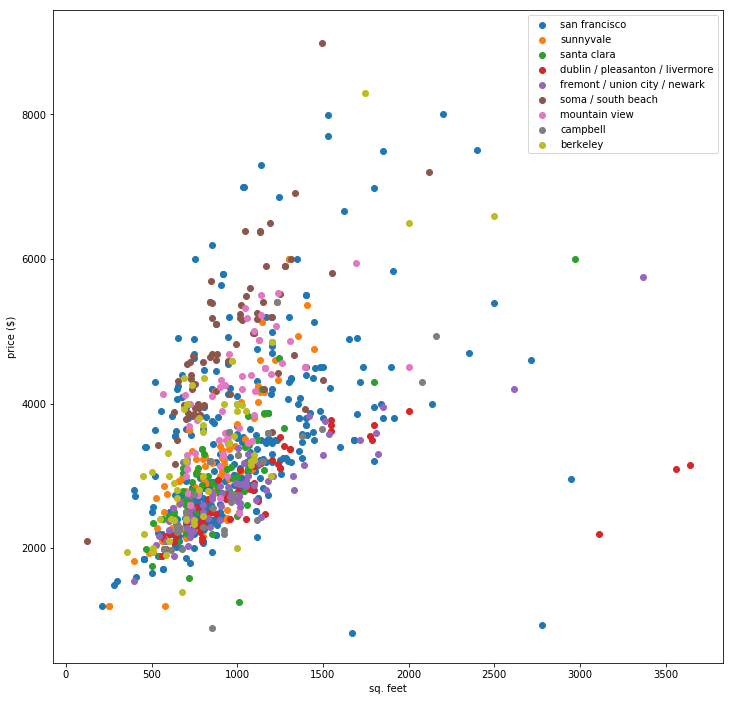

In [173]:
cm = plt.cm.get_cmap('tab10')
colors = [cm(1.*i/10) for i in range(len(maxhoods))];
cdict = dict(zip(maxhoods,colors))
clist = [cdict[nh] for nh in maxhoods]


fig,ax=plt.subplots(figsize=(12,12))

nhcount=[]
legendlist=[];
for i,nh in enumerate(maxhoods):
    dfnh=dfclean.loc[dfclean['neighborhood']==nh].sample(frac=1)
    ax.scatter(dfnh['sq. feet'],dfnh['price'],c=clist[i])
    legendlist.append(nh)
    nhcount.append([nh,len(dfnh)])
ax.legend(legendlist);#,bbox_to_anchor = (1,1));
ax.set_xlabel('sq. feet');
ax.set_ylabel('price ($)');

## fit a gaussian to rent per room data, for each neighborhood

In [174]:
#for each neighborhood, just fit price to a (1-dimensional) gaussian.


#dfsimple = dfclean[['rent per room']+maxhoods]
#dfsimple.head()

##split off some test data
#actually, no need, since i have no labels anyway.
dftrain=dflim[:]
#dftrain=dflim.sample(frac=.7)
#dftest = dflim.drop(dftrain.index)



Xnhs=[];
munh=[];
signh=[];
for nh in maxhoods:
    Xnh = dftrain.loc[dftrain['neighborhood']==nh]['rent per room'].values
    Xnhs.append(Xnh)
    munh.append(np.mean(Xnh));
    signh.append(np.std(Xnh));
    


In [175]:
print(f"The mean rent per room in San Francisco is ${np.round(munh[maxhoods.index('san francisco')],2)}.")

The mean rent per room in San Francisco is $2212.93.


But the price distributions tend to have long tails in the higher price ranges, which pulls the mean up. The most common prices are usually a bit below the mean. In a future iteration of this project, I'll try to account for this by using a skewed distribution.

In [176]:
#define gaussian in case i ever need it..
def gauss(x,mu,sig):
    pi=np.pi
    norm = ((2*pi)**.5)*sig
    exponent = (x-mu)**2/(2*sig**2)
    return np.exp(-exponent)/norm

## Flag listings with rent per room sufficiently below the neighborhood mean:

In [177]:
sigmas=1.5 #number of standard deviations from mean to be called an anomaly
def isitadeal(rent_per_room,nh): 
    mu = munh[ maxhoods.index(nh) ];
    sig = signh[ maxhoods.index(nh) ];
    if rent_per_room < mu - sigmas*sig:
        return(1)
    else:
        return(0)
    
#     if len(rent_per_room) != len(nh):
#         print('Oh no! Input arrays must be the same length.')
#     else:
#         prediction=np.zeros(len(rent_per_room))
#         prediction[rent_per_room < mu - sigmas*sig]  = 1


In [178]:
pp=dflim['rent per room'].values
nh = dflim['neighborhood'].values

predictions=np.zeros(len(dflim))
for i in range(len(pp)):
    predictions[i] = isitadeal(pp[i],nh[i])
    
dflim['deal?'] = predictions

print('Here are the (possible) deals/scams:')
dfdeals=dflim.loc[dflim['deal?']==1][['description','link','bedrooms','neighborhood','price','rent per room']].sort_values(by='rent per room')

dfdeals.head()

Here are the (possible) deals/scams:


,description,link,bedrooms,neighborhood,price,rent per room
2959,Three Bedroom 2 Bath Property,https://sfbay.craigslist.org/sfc/apa/d/folsom-...,3.0,san francisco,825.0,275.000000
846,5 bedroom 3 &1/2 full bathroom (Patterson),https://sfbay.craigslist.org/eby/apa/d/patters...,5.0,dublin / pleasanton / livermore,2195.0,439.000000
795,"Great location. Beautiful house, furnished roo...",https://sfbay.craigslist.org/sby/apa/d/sunnyva...,2.0,sunnyvale,1200.0,600.000000
2179,Schedule a tour! Nice large 6 Bed 2 Bath Singl...,https://sfbay.craigslist.org/sby/apa/d/san-jos...,6.0,san francisco,3995.0,665.833333
426,Nice home for rent in Mountain house,https://sfbay.craigslist.org/eby/apa/d/tracy-n...,4.0,dublin / pleasanton / livermore,3100.0,775.000000


sanity check: Indeed, it seems homes with more rooms are cheaper per room.

In [179]:


from IPython.core.display import display, HTML

# NH = 'palo alto'
# NH = NH.lower().strip()
# links= dfdeals.loc[dfdeals['neighborhood']==NH]['link'].values
# X = np.array(dfdeals.loc[dfdeals['neighborhood']==NH][['rent per room','neighborhood','bedrooms']])
links= dfdeals['link'].values
X = np.array(dfdeals[['rent per room','neighborhood','bedrooms']])


print('with links:')
#count=0
for i,x in enumerate(X):
    rent=x[0];
    nh=x[1];
    bedrooms=x[2];
    if isitadeal(rent,nh)==1:
        #print(f"A {x[1]} sq. foot {x[0]}-bedroom home for ${x[2]} is anomalous:")
        display(HTML("<a href="+links[i]+" target='_blank'> $"+str(np.round(rent))+" per room in a "+str(nh).capitalize()+" "+str(int(bedrooms))+"-bedroom. </a>"))
#        count=count+1

#print(count)


with links:


In [180]:
maxhoods

['san francisco',
 'sunnyvale',
 'santa clara',
 'dublin / pleasanton / livermore',
 'fremont / union city / newark',
 'soma / south beach',
 'mountain view',
 'campbell',
 'berkeley']

## TO DO:

Sometimes this misrepresents rent per room, e.g. if someone is renting out just 1 room in a 2-bedroom, and has listed rent for just the 1 room, but has posted the listing as a "2-bedroom". Can I find a way to correct this error by looking for particular words in the description/title?

In [294]:
np.sum(['san francisco' == h for h in hood2])

7

In [181]:
sfhoods

['alamo square',
 'anza vista',
 'ashbury heights',
 'balboa park',
 'balboa terrace',
 'bayview',
 'belden place',
 'bernal heights',
 'buena vista',
 'butchertown',
 'castro',
 'cathedral hill',
 'cayuga terrace',
 'china basin',
 'chinatown',
 'civic center',
 'clarendon heights',
 'cole valley',
 'corona heights',
 'cow hollow',
 'crocker-amazon',
 'design district',
 'diamond heights',
 'dogpatch',
 'dolores heights',
 'duboce triangle',
 'embarcadero',
 'eureka valley',
 'excelsior',
 'fillmore',
 'financial district',
 'financial district south',
 "fisherman's wharf",
 'forest hill',
 'forest knolls',
 'glen park',
 'golden gate heights',
 'haight-ashbury',
 'hayes valley',
 'hunters point',
 'india basin',
 'ingleside',
 'ingleside terraces',
 'inner sunset',
 'irish hill',
 'islais creek',
 'jackson square',
 'japantown',
 'jordan park',
 'laguna honda',
 'lake street',
 'lakeside',
 'lakeshore',
 'laurel heights',
 'lincoln manor',
 'little hollywood',
 'little russia',
 'lit

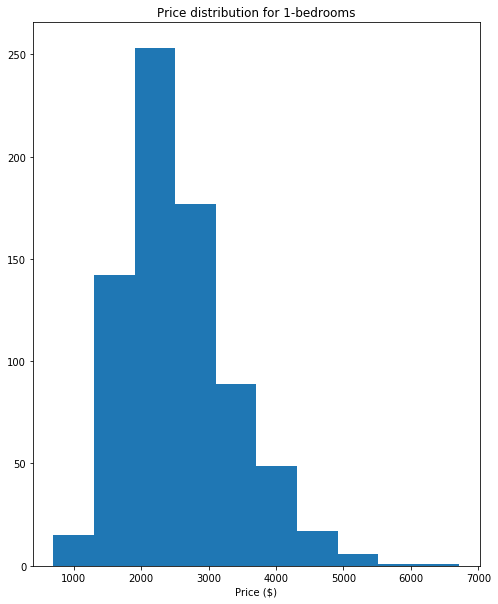

In [35]:
#plot the price distribution of 1-bedrooms from the training and test data

fig,ax =plt.subplots(1,1, figsize=(8,10))
ax.hist(dfclean.loc[dfclean['bedrooms']==1.0]['price']);
ax.set_xlabel('Price ($)');
ax.set_title('Price distribution for 1-bedrooms');



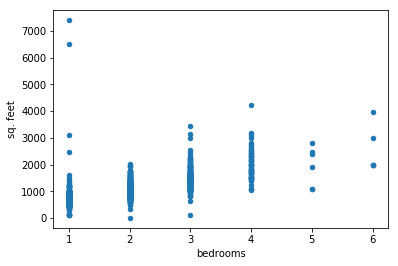

In [37]:
dfclean.plot('bedrooms','sq. feet',kind = 'scatter')

Text(0,0.5,'mean area (ft$^2$)')

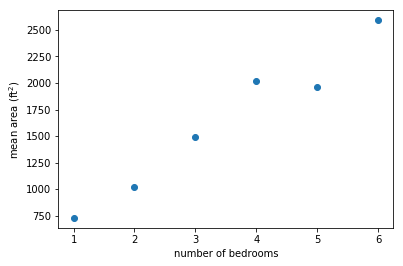

In [38]:
groupedbybedrooms = dfclean.groupby(by='bedrooms').mean();
plt.plot(groupedbybedrooms.index.values,groupedbybedrooms['sq. feet'],'o')
plt.xlabel('number of bedrooms')
plt.ylabel('mean area (ft$^2$)')

In [361]:
#train for anomaly detection and make predictions


# #compute the mean
# mu = train[['bedrooms','1000sqfeet', 'pricek']].mean().values
# #mu = np.array(np.mean(train)[['bedrooms','1000sqfeet','pricek']])
# xminusmu = np.array(train[['bedrooms','1000sqfeet', 'pricek']]-mu)

# #compute covariance matrix
# m=xminusmu.shape[0]
# Sigi=0;
# for i in range(0,m):
#     Sigi=Sigi+np.outer(xminusmu[i], (xminusmu[i]).T)
# Sig=(1/m)*Sigi
# detSig = np.linalg.det(Sig)

# Siginv = np.linalg.inv(Sig)
# n=len(mu)
# def p(x):
#     #p takes x in [bedrooms, square feet, dollars]
#     y=np.array([x[0],x[1]/1000,x[2]/1000]) #convert to 1000s of sq feet, 1000s of dollars
#     exp=np.e**(-.5*np.dot(y-mu,np.dot(Siginv,y-mu)))
#     return(exp/( (2*np.pi)**(n/2)*(detSig**(1/2)) ))


def multigauss(X,mu,Sig):  #input X is m by n (must be in the form of a 2-d array). inputs (X, mu, Sig) should be in 1000sqfeet, 1000$.
        #if mu[1]>X[0,1]*10 or mu[1]<X[0,1]/10:
        #    print('Make sure mu and X are in the same units.')
        n = X.shape[1];
        m = X.shape[0];
        Xminusmu = X-mu
        pi = np.pi
        det = np.linalg.det(Sig)
        inv = np.linalg.inv(Sig)
        exponent=-.5*np.reshape([np.dot( (X[i,:]-mu),  np.dot(inv,(X[i,:]-mu).T)) for i in range(0,m)],(m,1))
        return np.reshape(((2*pi)**(-.5*n))*(det**-.5)*np.exp(exponent),(m,))
    
    
#CHANGE FEATURES HERE 
featureset = ['bedrooms','pricek'];
n = len(featureset)


#fit mu, Sig for each neighborhood separately
nhmu = np.zeros((len(maxhoods),n))
nhSig = np.zeros((len(maxhoods),n,n))
for i,nh in enumerate(maxhoods):
    if type(nh)==str:
        #print(nh)
        dfnh = train.loc[train['neighborhood']==nh]
        if len(dfnh) is not 0:
            Xtrain = np.array(dfnh[featureset])
            m = Xtrain.shape[0]
            mu = np.mean(Xtrain,0)
            Xminusmu=Xtrain-mu
            Sig=(1/m)*np.dot(Xminusmu.T,Xminusmu)
            nhmu[i] = mu
            nhSig[i] = Sig
        else:
            nhmu[i]=np.nan
            nhSig[i]=np.nan
    else:
        nhmu[i]=np.nan
        nhSig[i]=np.nan
    

    
    
    


In [442]:
#e.g. mu and sigma for sunnyvale:
svmu=nhmu[maxhoods.index('sunnyvale')]
svSig=nhSig[maxhoods.index('sunnyvale')]

def svp(X):
    return multigauss(X,svmu,svSig)

svtest = test.loc[test['neighborhood']=='sunnyvale'][:]


svXtest=svtest[featureset].values


svtest['probability'] = svp(svXtest)
svtest[['description']+featureset+['probability']].sort_values(by='probability')


,description,bedrooms,pricek,probability
592,Single home in Homestead High district,4.0,5.000,0.000156
670,Beautiful New Construction - Skip the commute,3.0,4.500,0.015356
474,"Leasing Now, Near Shops and Dining, Business S...",2.0,4.500,0.016573
57,2-bedroom in convenient Sunnyvale location!,2.0,2.300,0.069692
1292,"Apartment Floorplans, EV Chargers, Swegles Par...",2.0,4.175,0.070305
1359,"Subterranean Parking, Comfort and Convenience,...",2.0,4.145,0.078625
2832,2 Bedroom/ 1 Bath Apartment- Nice Small Buildi...,2.0,2.420,0.106776
2021,"Bright and spacious 2-bedroom, 1-bath",2.0,2.500,0.137386
2551,1 Bedroom with gorgeous layout and endless ame...,1.0,3.250,0.177891
467,Come Home to Comfort and Convenience!,1.0,3.023,0.263076


## dont' know why this is not normalized how I expect --- come back to this later

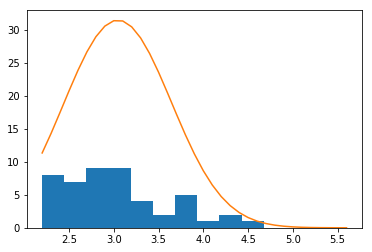

In [439]:
brrange = np.arange(min(dfsv['bedrooms']),max(dfsv['bedrooms']+1))
pprange = np.arange(min(dfsv['pricek']),max(dfsv['pricek']+1),.1)

plt.hist(dfsv['pricek'])
plt.plot(pprange,[len(dfsv['pricek'])*np.sum([multigauss(np.array([[br,pp]]),svmu,svSig) for br in brrange]) for pp in pprange])


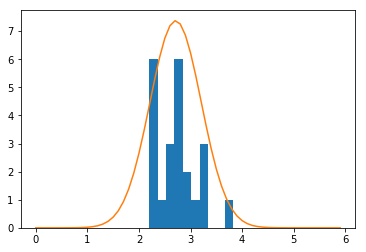

In [433]:
#this seems fine:

plt.hist(dfsv.loc[dfsv['bedrooms']==1]['pricek'])
plt.plot(pprange,[len(dfsv.loc[dfsv['bedrooms']==1])*multigauss(np.array([[1,pp]]),svmu,svSig) for pp in pprange])


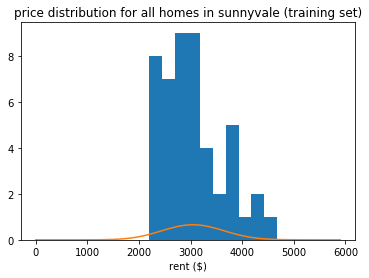

In [329]:
dfsv = train.loc[train['neighborhood']=='sunnyvale']

pprange = np.arange(0,6,.1);
plt.hist(dfsv['price'])
plt.plot(1000*pprange,np.array([np.sum([svp(np.array([[br,pp]])) for br in range(1,4)]) for pp in pprange]))
plt.xlabel('rent ($)')
plt.title('price distribution for all homes in sunnyvale (training set)');




Expected price given bedrooms and square footage: (want to use this to pick only anomalies where price is lower than expected)

In [385]:
XY[:,0]

array([0, 0, 0, 1, 1, 1, 1, 2, 3])

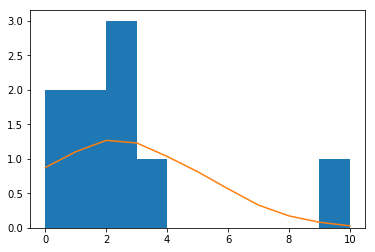

In [423]:
X = [0,0,0,1,1,1,1,2,3];
Y = [0,1,1,0,2,2,2,3,10];

XY = np.array([X,Y]).T



def gauss(x):
    xmu=np.mean(X);
    xsig=np.std(X);
    return((1/(((2*np.pi)**.5)*xsig))*np.exp(-(x-xmu)**2/(2*xsig**2)))

muXY=np.mean(XY,axis=0)



m=len(X);
SigXY=(1/m)*np.dot((XY-muXY).T,XY-muXY)

def multigaussXY(x,y):
    return multigauss(np.array([[x,y]]),muXY,SigXY)

xrange = np.arange(min(X),max(X)+1);
yrange = np.arange(min(Y),max(Y)+1);

plt.hist(Y)
plt.plot(yrange, [len(XY)*np.sum([multigaussXY(x, y) for x in xrange]) for y in yrange] )

In [292]:
brrange=list(set(dfsv['bedrooms']));
print(brrange)
.1*np.sum([np.sum([svp(np.array([[br,pp]])) for br in brrange]) for pp in pprange])

[1.0, 2.0, 3.0]


0.9725048005531944

(or see below for the quick and dirty method of finding expected price)

In [1222]:
bdrs = 1;
ksqfeet = 1;

pricerange = np.arange(0,50,.1);
probprice=[p(np.array([[bdrs, ksqfeet, kdollars]]), mu, Sig) for kdollars in pricerange]
maxid = np.argmax(probprice)


pricerange[maxid]*1000

3300.0000000000005

Now define function using this to say whether a given price is cheap:

In [1223]:
def isitcheap(X,mu,Sig):
    m=X.shape[0]
    n=X.shape[1]
    
    br = X[:,0]
    sqft = X[:,1]
    price = X[:,2]
    
    dz = 1;
    zmax = 100;
    pricerange = np.arange(0,zmax,dz);
    
    norm = np.zeros(m)
    exp_price = np.zeros(m)
    
    for i in range(0,m):
        norm[i] = dz*np.sum([p(np.array([[br[i],sqft[i],z]]),mu,Sig) for z in pricerange]);
        exp_price[i] = dz*np.sum([z*p(np.array([[br[i],sqft[i],z]]),mu,Sig) for z in pricerange])/norm[i];
    
    return price<exp_price
#returns "True" if price is lower than expected given br and sqft

In [1224]:
#define expected price seprately
def exp_price(br,sqft,mu,Sig):
    norm = dz*np.sum([p(np.array([[br,sqft,z]]),mu,Sig) for z in pricerange]);
    exp_price = dz*np.sum([z*p(np.array([[br,sqft,z]]),mu,Sig) for z in pricerange])/norm;
    return exp_price

In [1225]:
exp_price(4,1.15,mu,Sig)*1000

3325.39439869261

### Define probability density for price, given fixed number of bedrooms and square footage.

Text(0.5,1,'(Normalized) distribution for price, for 1-bedroom, 1000 sq-foot homes')

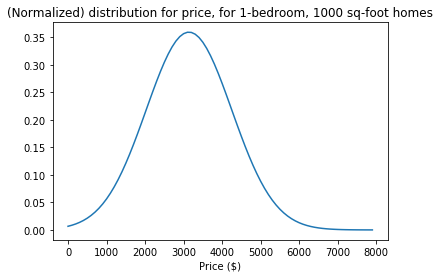

In [1095]:
br = 1;
sqft = 1;

dz=.1;
zmax = 8;
    
def pz(x0,y0,z):

    norm=dz*np.sum([p(np.array([[1,1,z]]),mu,Sig) for z in np.arange(0,zmax,dz)]);
    return p(np.array([[x0,y0,z]]),mu,Sig)/norm

#plt.plot(pricerange,[pz(1,1,z) for z in pricerange])

pricerange=np.arange(0,zmax,dz)
pzrange=np.reshape([pz(1,1,z) for z in pricerange],(len(pricerange),));

plt.plot(pricerange*1000,pzrange)
plt.xlabel('Price ($)')
plt.title(f'(Normalized) distribution for price, for {br}-bedroom, {sqft*1000} sq-foot homes')

In [1100]:
start = time.time()
dz*np.sum([pz(br,sqft,z)*z for z in pricerange])
end = time.time()
end-start

0.04316282272338867

This can the be used to get expected price given bedrooms and area.

In [1109]:
smallp=(p(Xval,mu,Sig)<.05)[:,0]

Xvalsmallp=Xval[smallp]

val['probability'] = p(Xval,mu,Sig)[:,0]

val[ (val['probability']<0.01)][val['pricek']<mu[2] ]

#need another filter, for /low/ price given other features.



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,description,link,bedrooms,sq. feet,price,1000sqfeet,pricek,probability
607,Beautiful 3 Bed 2 Bath - huge deck and amazing...,https://sfbay.craigslist.org/nby/apa/d/beautif...,3.0,1500.0,1450.0,1.5,1.450,0.006959
336,Residence/ Restaurant Opportunity,https://sfbay.craigslist.org/eby/apa/d/benicia...,3.0,2000.0,1.0,2.0,0.001,0.000002
310,Clearlake 3 bd 2bth 1000 sq. ft. $1300,https://sfbay.craigslist.org/nby/apa/d/clearla...,3.0,1000.0,1300.0,1.0,1.300,0.004400
1192,4 BEDROOM 2 BATH EXTRA CLEAN HOME,https://sfbay.craigslist.org/eby/apa/d/fairfie...,4.0,1700.0,2395.0,1.7,2.395,0.001830
881,4x2 house across from campolindo high you oayv...,https://sfbay.craigslist.org/eby/apa/d/moraga-...,4.0,1400.0,3150.0,1.4,3.150,0.001715


## predict

In [1240]:
#first use validation to set epsilon
eps = .02

def predict(x,mu,Sig): #input x is m by n (must be in the form of a 2-d array)
    m = x.shape[0]
    prediction=np.ones(m)
    prediction[p(x,mu,Sig)>eps] = 0
    prediction[isitcheap(x,mu,Sig)==False]=0
    return prediction

#         if isitcheap(x,mu,Sig)==True:
#             return True
#         else:
#             return False


Xtest = np.array(test[['bedrooms','1000sqfeet','pricek']])
testpred=predict(Xtest,mu,Sig)
testpred = testpred.astype(bool)

In [1247]:
test['probability']= p(Xtest,mu,Sig)

In [1249]:
test[testpred].sort_values(by='probability')[['description','link','bedrooms','sq. feet', 'price', 'probability']]

,description,link,bedrooms,sq. feet,price,probability
428,NEWER BIG HOME FOR 1-2 FAMILY AT NICE SAFE ARE...,https://sfbay.craigslist.org/nby/apa/d/santa-r...,6.0,5400.0,3999.0,1.870372e-38
275,NEWER BIG 1-2 FAMILY HOME 6-7 BR NICE SAFE ARE...,https://sfbay.craigslist.org/sfc/apa/d/santa-r...,7.0,5400.0,3995.0,7.687649e-35
284,EXTRA BIG NEWER HOME 7 BED. NICE SAFE AREA VER...,https://sfbay.craigslist.org/nby/apa/d/santa-r...,7.0,5400.0,3997.0,7.780431e-35
283,1-2 FAMILY NEWER BIG HOME AT BENNET VALLEY NIC...,https://sfbay.craigslist.org/nby/apa/d/santa-r...,7.0,5400.0,3997.0,7.780431e-35
2390,5BR/4.5BA Executive home in Windemere (San Ram...,https://sfbay.craigslist.org/eby/apa/d/san-ram...,5.0,4616.0,5495.0,3.147784e-24
703,Elegant Executive Pleasanton Laguna Oaks Estat...,https://sfbay.craigslist.org/eby/apa/d/fremont...,4.0,4000.0,6595.0,4.943503e-17
1196,Four bedroom in an accessible neighborhood,https://sfbay.craigslist.org/nby/apa/d/sausali...,4.0,4000.0,7999.0,5.511744e-16
577,Spectacular Hillside Home with Stunning Views ...,https://sfbay.craigslist.org/eby/apa/d/el-sobr...,4.0,3500.0,3900.0,1.841812e-13
2320,Generously Sized Single Family Home,https://sfbay.craigslist.org/sfc/apa/d/san-fra...,4.0,3630.0,7995.0,1.766716e-11
410,House for Rent (6 bedroom/2 bathroom) in San J...,https://sfbay.craigslist.org/sby/apa/d/san-jos...,6.0,2000.0,5000.0,1.330967e-08


In [1167]:
x = np.array([[1,0],[1,1],[3,2]]);
m=x.shape[0]
n = x.shape[1]
mu = np.reshape(np.mean(x,0),(1,n))

xminusmu = x-mu

Sig = (1/m)*np.dot(xminusmu.T,xminusmu) 
inv = np.linalg.inv(Sig)

x0 = x[0,:]

#np.exp(-.5*([np.dot( (x[i,:]-mu),  np.dot(inv,(x[i,:]-mu).T)) for i in range(0,m)]))

exponent=-.5*np.reshape([np.dot( (x[i,:]-mu),  np.dot(inv,(x[i,:]-mu).T)) for i in range(0,m)],(m,1))
np.exp(exponent)

array([[0.36787944],
       [0.36787944],
       [0.36787944]])

In [1206]:
#time to look for anomalies in the test data

test.head()

#put the test data into an array of x's:
testarray_links= np.array(test['link'])
testarray = np.array(test[['bedrooms','sq. feet', 'price']])

y=np.zeros(len(testarray))
for i,x in enumerate(testarray):
    y[i] = predict(x,mu,Sig)
    if predict(x)==1:
        print(f"A {x[1]} sq. foot {x[0]}-bedroom home for ${x[2]} is anomalous:")
        display(HTML("<a href="+testarray_links[i]+" target='_blank'>see link</a>"))
        
#at this stage, i think too many things are being flagged as anomalous, e.g. many-roomed homes, even if not particularly expensive per room.

IndexError: tuple index out of range

In [502]:
testnotforsale=test.drop(test[test['price']>50000].index)
type(testnotforsale)

pandas.core.frame.DataFrame

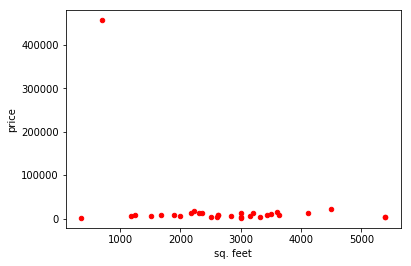

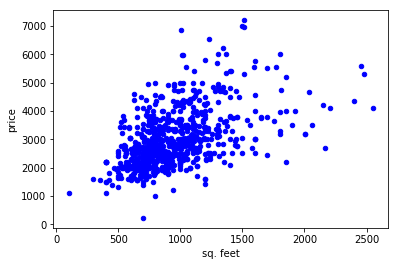

In [504]:
test[y==1].plot('sq. feet', 'price',kind='scatter',color='r')
test[y==0].plot('sq. feet', 'price',kind='scatter',color='b')

In [417]:
#complex p?

In [1060]:



#fix to 1 bedrooms and look at probability distribution in the two dimensions of square footage and price
sqfeetrange = np.arange(0,5000,100);
pricerange = np.arange(0,10000,100);
X, Y = np.meshgrid( sqfeetrange, pricerange);

Z = np.array([[p(np.array([1,x,y]),mu,Sig) for x in sqfeetrange] for y in pricerange])




from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()



ax = fig.gca(projection='3d')

ax.scatter([1000],[4000],p(np.array([1,1000,4000]),mu,Sig),color='k',marker = 'o')

surf = ax.plot_surface(X, Y, Z)#, cmap=cm.coolwarm)#,
                       #linewidth=0, antialiased=False)
ax.set_xlabel('sq. feet')
ax.set_ylabel('price')



IndexError: too many indices for array

In [449]:
np.sqrt(detSig)

0.26390435668938306

In [970]:
#average price per room for 1 br, 2br, 3br
#[np.mean(df.loc[df['bedrooms']==i]['price'])/i for i in range(1,6)]

In [971]:
#df.loc[df['price']>5000]

In [365]:
# old train and predict

#remove rows with missing data
# dfclean=df_no_duplicates.dropna()[:]

# dfclean['1000sqfeet']=dfclean['sq. feet']/1000  #normalize so all features are order 1 (no area is in 1000s of square feet)
# dfclean['pricek']=dfclean['price']/1000 #normalize so all features are order 1 (price is in thousands of dollars)

# #compute the mean
# mu = np.array(np.mean(dfclean)[['bedrooms','1000sqfeet','pricek']])
# xminusmu = np.array(dfclean[['bedrooms','1000sqfeet', 'pricek']]-mu)

# #compute covariance matrix
# m=xminusmu.shape[0]
# Sigi=0;
# for i in range(0,m):
#     Sigi=Sigi+np.outer(xminusmu[i], (xminusmu[i]).T)
# Sig=(1/m)*Sigi
# detSig = np.linalg.det(Sig)

# Siginv = np.linalg.inv(Sig)
# n=len(mu)
# def p(x):
#     #p takes x in [bedrooms, 1000s of square feet, 1000s of dollars]
#     exp=np.e**(-.5*np.dot(x-mu,np.dot(Siginv,x-mu)))
#     return(exp/( (2*np.pi)**(n/2)*(detSig**(1/2)) ))
    
# #set a 1-sigma cut-off?
# def predict(x):
#     #x = [bedrooms, square feet, price (in dollars)]
#     eps = p(mu-[Sig[0,0],(Sig[1,1]),Sig[2,2]  ]);
#     y = np.array([x[0], x[1]/1000, x[2]/1000])
#     if p(y)>=eps:  #p takes x in [bedrooms, 1000s of square feet, 1000s of dollars]
#         print(f"A {np.round(x[1])} sq. foot {int(x[0])}-bedroom home for ${np.round(x[2],2)} is not anomalous.")
#     else:
#         print(f"A {x[1]} sq. foot {x[0]}-bedroom home for ${x[2]} is anomalous.")    
    

Text(0.5,1,'Probability distribution for average bedrooms and area, as a functin of price')

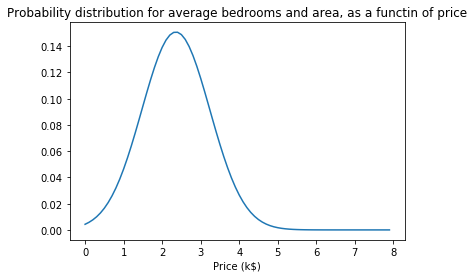

In [973]:
pricerange = np.arange(0,int(max(dfclean['pricek'])),.1);
xs = [[1,.8,price] for price in pricerange]
plt.plot([price for price in pricerange], [p(xs[i]) for i in range(0,len(xs))])
plt.xlabel('Price (k$)')
plt.title('Probability distribution for average bedrooms and area, as a functin of price')


In [974]:
x=np.zeros(3);
x[0]=1
x[1]=np.mean(dfclean.loc[dfclean['bedrooms']==x[0]]['1000sqfeet'])
x[2] = .5
x=np.array(x)
print(f"Check probability of feature vector {x}")
print(f"There's a {np.round(p(x)*100,2)}% chance that a {int(x[0])}-bedroom of average size \nwould cost ${x[2]*1000}. This is somewhat anomalous.")

Check probability of feature vector [1.         0.72616667 0.5       ]
There's a 2.19% chance that a 1-bedroom of average size 
would cost $500.0. This is somewhat anomalous.


In [975]:
predict(np.array([3,1000,3500]))

A 1000 sq. foot 3-bedroom home for $3500 is anomalous.


In [976]:
#now i need to get more data by scraping other pages,
# and properly split my data into training/testing (don't think i need CV for anything?)

In [548]:
re.compile('[a-z ]+').search(resultrow.find(class_="result-hood").text.strip()).group() for resultrow in resultrows


'lower pac hts'

In [546]:
lowerpachts=resultrows[3].find(class_="result-hood").text.strip()

re.compile('[a-z ]+').findall(lowerpachts)

['lower pac hts']

In [520]:
resultrows.find_all(class_="result-hood")

AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

# other cleaning considerations

In [239]:

#plenty list price zero. obviously this is false.
df[df['price']==0]

#extract the most expensive neighborhoods?

nhp=[];
for nh in hoods:
    nhp.append([nh, np.mean(df[df['neighborhood']==nh]['price'])])
    
    
pd.DataFrame(nhp,columns=['neighborhood','average price']).sort_values(by='average price',ascending=False)


,neighborhood,average price
8,clarendon heights -,25000.000000
130,"hillsborough, ca",16000.000000
111,kentfield / ross,10650.000000
109,laurel hts / presidio,9300.000000
65,soma,6190.000000
28,financial district,5903.461538
141,tiburon / belvedere,5901.666667
36,rincon hill,5790.000000
53,cole valley / ashbury hts,5373.750000
23,saratoga,5100.000000
